# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID:
- Names:  
- Student IDs:  
- Emails:  
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ipywidgets import IntProgress
import pandas as pd
from IPython.display import display
from zipfile import ZipFile


# Your file might be in a different location, so you need to customize the path
all_files = ZipFile('/content/drive/MyDrive/2021SIT742Ass1/HTWebLog_p1.zip', 'r')
files = all_files.namelist()

data = []
# Define the column names
ColumnNames=['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status']


In [ ]:
#Your code to load data from all log files in the provided zip file
all_files.extractall() # unzip

def load_log(file_name):
  data = []
  with open(file_name,encoding="utf8", errors='ignore') as lines:
    for line in lines:
      line = line.replace('\n', '')
      line = line.replace('-', '')
      line_list = line.split(" ")
      if len(line_list) == 15:
        data.append(line_list)
      else:
        print(line_list)
        pass
  df = pd.DataFrame(data,columns = ColumnNames)
  return df

In [ ]:
df1 = pd.DataFrame(columns = ColumnNames)
for i in files:
  df2 = load_log(i)
  df1 = df1.append(df2)

['#Software:', 'Microsoft', 'Internet', 'Information', 'Services', '6.0']
['#Version:', '1.0']
['#Date:', '20061101', '00:00:08']
['#Fields:', 'date', 'time', 'ssitename', 'sip', 'csmethod', 'csuristem', 'csuriquery', 'sport', 'csusername', 'cip', 'cs(UserAgent)', 'cs(Referer)', 'scstatus', 'scsubstatus', 'scwin32status', '']
['#Software:', 'Microsoft', 'Internet', 'Information', 'Services', '6.0']
['#Version:', '1.0']
['#Date:', '20061101', '04:19:47']
['#Fields:', 'date', 'time', 'ssitename', 'sip', 'csmethod', 'csuristem', 'csuriquery', 'sport', 'csusername', 'cip', 'cs(UserAgent)', 'cs(Referer)', 'scstatus', 'scsubstatus', 'scwin32status', '']
['#Software:', 'Microsoft', 'Internet', 'Information', 'Services', '6.0']
['#Version:', '1.0']
['#Date:', '20061102', '00:00:08']
['#Fields:', 'date', 'time', 'ssitename', 'sip', 'csmethod', 'csuristem', 'csuriquery', 'sport', 'csusername', 'cip', 'cs(UserAgent)', 'cs(Referer)', 'scstatus', 'scsubstatus', 'scwin32status', '']
['#Software:', '

In [ ]:
df1

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,,80,,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/enus/home_index.aspx,,80,,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,,200,0,0
2,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,,80,,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
3,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=enus,80,,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
4,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/top_img.jpg,,80,,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63741,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_greenp...,,80,,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
63742,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_recrui...,,80,,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
63743,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/home/enus/images/awards.jpg,,80,,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
63744,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/bottom.jpg,,80,,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0


In [ ]:
df1.to_csv('/content/drive/MyDrive/2021SIT742Ass1/log_all2.csv',index = False)

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/2021SIT742Ass1/log_all2.csv')

In [ ]:
data = df1
data

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/enus/home_index.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN,200,0,0
2,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
3,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=enus,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
4,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/top_img.jpg,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438923,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_greenp...,NaN,80,NaN,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
8438924,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_recrui...,NaN,80,NaN,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
8438925,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/home/enus/images/awards.jpg,NaN,80,NaN,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0
8438926,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/bottom.jpg,NaN,80,NaN,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200,0,0


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data.isnull()

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438923,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
8438924,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
8438925,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
8438926,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False


In [ ]:
# column
ColumnNames=['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status']
df_ht = data
for i in ColumnNames:
  if data[f'{i}'].isnull().sum()/data.shape[0] >= 0.15:
    df_ht = df_ht.drop(columns=[f'{i}'])
    print(i)
df_ht

cs_uri_query
cs_username
cs(Referer)


,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,s_port,c_ip,cs(User_Agent),sc_status,sc_substatus,sc_win32_status
0,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/enus/home_index.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
3,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/top_img.jpg,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8438923,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_greenp...,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
8438924,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_recrui...,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
8438925,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/home/enus/images/awards.jpg,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
8438926,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/bottom.jpg,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [ ]:
# raw
df_ht['cs(Referer)'] = data['cs(Referer)']
df_ht = df_ht.dropna(axis=0)
df_ht

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,s_port,c_ip,cs(User_Agent),sc_status,sc_substatus,sc_win32_status,cs(Referer)
0,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.google.com/search?sourceid=navclien...
2,20061101,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...
3,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...
4,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/top_img.jpg,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...
5,20061101,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/top_logo.gif,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438923,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_greenp...,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...
8438924,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/sectionbanner_recrui...,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...
8438925,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/home/enus/images/awards.jpg,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...
8438926,20070228,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/enus/images/bottom.jpg,80,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0,http://www.hotelTulip.com.hk/Tulip/home/enus/h...


In [ ]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
weblog_df.to_csv('/content/drive/MyDrive/2021SIT742Ass1/weblog.csv',index = False)
weblog_df.shape


(2138966, 13)

### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'cs_ip'*,*'cs_uri_stem'*,*'cs(Referer)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
# Your code for feature selection
import pandas as pd
data_c = pd.read_csv('/content/drive/MyDrive/2021SIT742Ass1/weblog.csv')
ml_column = ['cs_method','c_ip','cs_uri_stem','cs(Referer)','sc_status']
ml_df = data_c[ml_column]
ml_df = ml_df.dropna(axis=0)
#Your code to show the top 5 rows of ml_df
ml_df.head()

,cs_method,c_ip,cs_uri_stem,cs(Referer),sc_status
0,GET,221.188.34.230,/Tulip/common/enus/images/sectionbanner_whatsn...,http://www.hotelTulip.com.hk/Tulip/accommodati...,304
1,GET,210.184.71.81,/Tulip/common/common_style.aspx,http://www.hotelTulip.com.hk/Tulip/home/enus/h...,200
2,GET,221.127.69.86,/Tulip/common/common_style.aspx,http://www.hotelTulip.com.hk/Tulip/catering/zh...,200
3,GET,202.181.238.254,/Tulip/catering/enus/images/btn_fountainsroom.gif,http://www.hotelTulip.com.hk/Tulip/catering/en...,200
4,GET,58.152.202.164,/Tulip/common/common_style.aspx,http://www.hotelTulip.com.hk/Tulip/dining/enus...,200


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [ ]:
from sklearn import preprocessing
le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

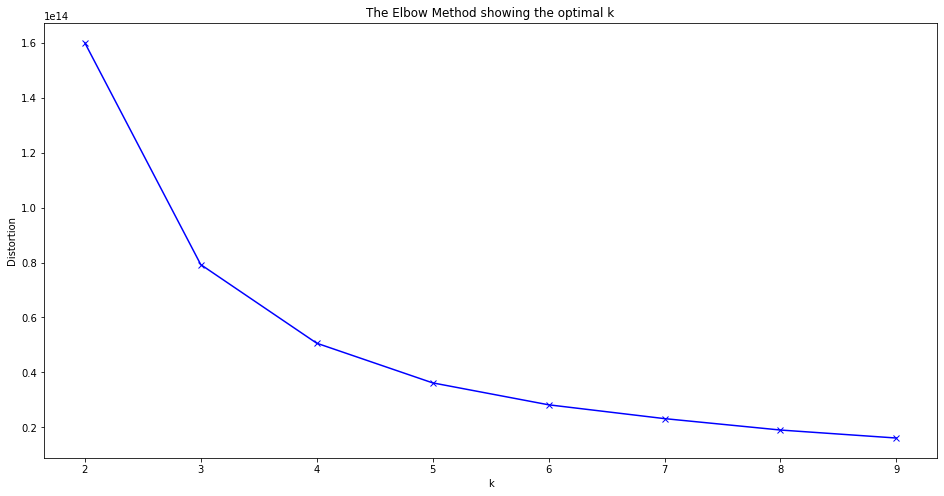

In [ ]:
#Your code for Kmeans
from sklearn.cluster import KMeans
distortions = []
K = range(2,10)
for k in K:
  kmean = KMeans(n_clusters=k)
  kmean.fit(le_df)
  distortions.append(kmean.inertia_)


#Your code for visualizing K means result as elbow plot.
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
!sudo apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [55.5 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("sc-status", IntegerType(), True),
                     StructField("cs-method", IntegerType(), True),
                     StructField("c-ip", IntegerType(), True),
                     StructField("cs-uri-stem", IntegerType(), True),
                     StructField("cs(Referer)", IntegerType(), True)])
c = ['sc_status','cs_method','c_ip','cs_uri_stem','cs(Referer)']
lr_df = le_df[c].sample(frac = 0.1)
lr_df = spark.createDataFrame(lr_df, schema)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs-method', 'c-ip', 'cs-uri-stem', 'cs(Referer)'],outputCol="features")
df_temp = vector_assembler.transform(lr_df)
df_temp.show(3)

+---------+---------+-----+-----------+-----------+--------------------+
|sc-status|cs-method| c-ip|cs-uri-stem|cs(Referer)|            features|
+---------+---------+-----+-----------+-----------+--------------------+
|        4|        0|47569|       1276|      23529|[0.0,47569.0,1276...|
|        0|        0|41164|       1253|      23660|[0.0,41164.0,1253...|
|        0|        0| 7854|       1438|      23600|[0.0,7854.0,1438....|
+---------+---------+-----+-----------+-----------+--------------------+
only showing top 3 rows



In [ ]:
df_lr = df_temp.drop('cs-method', 'c-ip', 'cs-uri-stem', 'cs(Referer)')
df_lr.show(3)

+---------+--------------------+
|sc-status|            features|
+---------+--------------------+
|        4|[0.0,47569.0,1276...|
|        0|[0.0,41164.0,1253...|
|        0|[0.0,7854.0,1438....|
+---------+--------------------+
only showing top 3 rows



###  3.2 Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_lr.randomSplit([0.7, 0.3])
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 149567
Test Dataset Count: 64330


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Your code contains trainning from train data and predicting based on the test data
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression()
model = lr.setLabelCol("sc-status").setFeaturesCol("features").fit(trainingData)
pred = model.transform(testData)
pred.show()

+---------+--------------------+--------------------+--------------------+----------+
|sc-status|            features|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+--------------------+----------+
|        0|[0.0,3.0,1495.0,2...|[11.8553487640606...|[0.75409962696672...|       0.0|
|        0|[0.0,3.0,1502.0,2...|[11.8582950283992...|[0.75419379629029...|       0.0|
|        0|[0.0,4.0,1269.0,2...|[11.7079800464736...|[0.74886616500390...|       0.0|
|        0|[0.0,7.0,1229.0,2...|[11.6965037272238...|[0.74825733925405...|       0.0|
|        0|[0.0,7.0,1242.0,2...|[11.7595385143893...|[0.75015022130231...|       0.0|
|        0|[0.0,15.0,1097.0,...|[11.6448789252383...|[0.74573709592856...|       0.0|
|        0|[0.0,15.0,1648.0,...|[11.9184693069870...|[0.75560680462401...|       0.0|
|        0|[0.0,19.0,1224.0,...|[11.7106397319200...|[0.74861920316004...|       0.0|
|        0|[0.0,21.0,1246.0,...|[11.7611302034913...|[

In [ ]:
# Your code to display TP, TN, FP, FN
pred = model.transform(testData)
y_true = pred.select(['sc-status']).collect()
y_pred = pred.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[47186     0     0    17     0     0     0     1]
 [   52     0     0     0     0     0     0     0]
 [    5     0     0     0     0     0     0     0]
 [    2     0     0    54     0     0     0     7]
 [16717     0     0     0     0     0     0     0]
 [    0     0     0     1     0     0     0     0]
 [  283     0     0     0     0     0     0     0]
 [    0     0     0     5     0     0     0     0]]


In [ ]:
from sklearn.metrics import classification_report

# Your Code to display the classification results as required.
print(classification_report(y_true,y_pred))

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
precision = MulticlassClassificationEvaluator(labelCol="sc-status",predictionCol="prediction", metricName="weightedPrecision").evaluate(pred)
recall = MulticlassClassificationEvaluator(labelCol="sc-status",predictionCol="prediction", metricName="weightedRecall").evaluate(pred)
F1 = MulticlassClassificationEvaluator(labelCol="sc-status",predictionCol="prediction", metricName="f1").evaluate(pred)
print("The precision is :",precision)
print("The recall is :",recall)
print('The F1 is :',F1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.73      1.00      0.85     47204
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00         5
           3       0.70      0.86      0.77        63
           4       0.00      0.00      0.00     16717
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00       283
           9       0.00      0.00      0.00         5

    accuracy                           0.73     64330
   macro avg       0.18      0.23      0.20     64330
weighted avg       0.54      0.73      0.62     64330

The precision is : 0.5396251394252246
The recall is : 0.7343385667651173
The F1 is : 0.6220996574723278


### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# K = 2
# Your code for 2-fold cross validation
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'sc-status', numTrees=500)
grid = ParamGridBuilder()\
    .addGrid(rf.maxDepth, [6, 8, 10]) \
    .addGrid(rf.numTrees, [20, 25, 30])\
    .addGrid(rf.featureSubsetStrategy, ['onethird', 'sqrt', 'log2'])\
    .build()

pipeline = Pipeline(stages=[vector_assembler])
data_transformer = pipeline.fit(trainingData)

precision = MulticlassClassificationEvaluator(labelCol="sc-status",predictionCol="prediction", metricName="weightedPrecision")#.evaluate(pred)
recall = MulticlassClassificationEvaluator(labelCol="sc-status",predictionCol="prediction", metricName="weightedRecall")#.evaluate(pred)
F1 = MulticlassClassificationEvaluator(labelCol="sc-status",predictionCol="prediction", metricName="f1")#.evaluate(pred)


# 进行2折交叉验证
cv = CrossValidator(
    estimator=rf, 
    estimatorParamMaps=grid, 
    evaluator=precision,
    numFolds=2)

# fit model
cvModel = cv.fit(trainingData)
 
# train model
prediction = cvModel.transform(trainingData)

In [ ]:
pred_test = cvModel.transform(testData)
precision_test = precision.evaluate(pred_test)
recall_test = recall.evaluate(pred_test)
F1_test = F1.evaluate(pred_test)

print("The precision is :",precision_test)
print("The recall is :",recall_test)
print('The F1 is :',F1_test)
# Displays the optimal parameter combination
parameters = [([{key.name: paramValue} 
         for key, paramValue 
         in zip(params.keys(), 
             params.values())
          ], metric) 
    for params, metric 
    in zip(cvModel.getEstimatorParamMaps(), 
        cvModel.avgMetrics)]
 
print(sorted(parameters, key=lambda el: el[1], reverse=True)[0])

The precision is : 0.7243533668656434
The recall is : 0.7352557127312296
The F1 is : 0.6250141812261354
([{'maxDepth': 6}, {'numTrees': 25}, {'featureSubsetStrategy': 'onethird'}], 0.7405888337771256)


In [ ]:
print(pd.DataFrame(sorted(parameters, key=lambda el: el[1], reverse=True),columns = ['parameters','precision']))

                                           parameters  precision
0   [{'maxDepth': 6}, {'numTrees': 25}, {'featureS...   0.740589
1   [{'maxDepth': 6}, {'numTrees': 25}, {'featureS...   0.740589
2   [{'maxDepth': 6}, {'numTrees': 25}, {'featureS...   0.740589
3   [{'maxDepth': 10}, {'numTrees': 20}, {'feature...   0.737192
4   [{'maxDepth': 10}, {'numTrees': 20}, {'feature...   0.737192
5   [{'maxDepth': 10}, {'numTrees': 20}, {'feature...   0.737192
6   [{'maxDepth': 10}, {'numTrees': 25}, {'feature...   0.734603
7   [{'maxDepth': 10}, {'numTrees': 25}, {'feature...   0.734603
8   [{'maxDepth': 10}, {'numTrees': 25}, {'feature...   0.734603
9   [{'maxDepth': 10}, {'numTrees': 30}, {'feature...   0.734563
10  [{'maxDepth': 10}, {'numTrees': 30}, {'feature...   0.734563
11  [{'maxDepth': 10}, {'numTrees': 30}, {'feature...   0.734563
12  [{'maxDepth': 8}, {'numTrees': 30}, {'featureS...   0.726720
13  [{'maxDepth': 8}, {'numTrees': 30}, {'featureS...   0.726720
14  [{'maxDepth': 8}, {'n

## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=ce5be0d92d12f58ff8b3a833fe0a685f0cb314fbeb1013a00a87a749f89f4dd8
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/2021SIT742Ass1/weblog.csv')
rule_df = data.sample(frac = 0.1)

In [ ]:
# you can also use PySpark package, if preferred
from apyori import apriori

# Your code
records = rule_df.values.astype(str).tolist()
#records
associations = apriori(records, min_lift=1.05)
rule = list(associations)

In [ ]:
statistics = []
for i  in range(len(rule)):
  statistics.append(rule[i].ordered_statistics[0])

rule_dff = pd.DataFrame(statistics)
rule_dff['item'] = [rule[i].items for i in range(len(rule))]
rule_dff['support'] = [rule[i].support for i in range(len(rule))]
columns = ['item','support','confidence','lift']
rule_df2 = rule_dff[columns]
rule_top = rule_df2.sort_values(by='lift')[0:4]
rule_top

,item,support,confidence,lift
0,"(200, http://www.hotelTulip.com.hk/Tulip/home/...",0.181372,0.246819,1.087658
29,"(GET, 0, http://www.hotelTulip.com.hk/Tulip/ho...",0.181372,0.246819,1.087658
28,"(GET, http://www.hotelTulip.com.hk/Tulip/home/...",0.181372,0.246819,1.087658
27,"(0, http://www.hotelTulip.com.hk/Tulip/home/en...",0.181372,0.246819,1.087658


In [ ]:
rule_top.values.tolist()

[[frozenset({'200',
             'http://www.hotelTulip.com.hk/Tulip/home/enus/home_index.aspx'}),
  0.1813723427631056,
  0.24681893370657843,
  1.0876579546969654],
 [frozenset({'0',
             '200',
             '80',
             'GET',
             'W3SVC1',
             'http://www.hotelTulip.com.hk/Tulip/home/enus/home_index.aspx'}),
  0.1813723427631056,
  0.24681893370657843,
  1.0876579546969654],
 [frozenset({'0',
             '127.0.0.1',
             '200',
             'GET',
             'W3SVC1',
             'http://www.hotelTulip.com.hk/Tulip/home/enus/home_index.aspx'}),
  0.1813723427631056,
  0.24681893370657843,
  1.0876579546969654],
 [frozenset({'0',
             '127.0.0.1',
             '200',
             '80',
             'W3SVC1',
             'http://www.hotelTulip.com.hk/Tulip/home/enus/home_index.aspx'}),
  0.1813723427631056,
  0.24681893370657843,
  1.0876579546969654]]

# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [2]:
# Your code to crawl and generate the csv, and save it to variable create_df
import requests
import lxml
from lxml import etree
import pandas as pd
import numpy as np
url_1="https://scholar.google.com/citations?hl=zh-CN&user=dqwjm-0AAAAJ#d=gsc_md_hist"
r_1=requests.get(url_1)
a=r_1.text

html=  etree.HTML(a)
years = html.xpath('//div[@class="gsc_md_hist_b"]/span/text()')
cites = html.xpath('//div[@class="gsc_md_hist_b"]/a/span/text()')
cita = pd.DataFrame(columns = ['year','Citation'])
cita['year'] = years
cita['Citation'] = cites
cita.to_csv('/content/drive/MyDrive/2021SIT742Ass1/Citation2003-2021.csv',index = False)

In [3]:
create_df = pd.read_csv('/content/drive/MyDrive/2021SIT742Ass1/Citation2003-2021.csv')
create_df

,year,Citation
0,2003,15
1,2004,34
2,2005,17
3,2006,11
4,2007,33
5,2008,41
6,2009,57
7,2010,68
8,2011,105
9,2012,129


In [4]:
create_data = pd.Series(np.array(create_df['Citation'].astype('float64')),
               index=pd.period_range('2003','2021',freq='Y'))

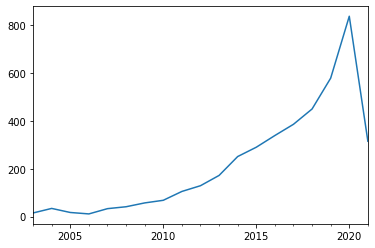

In [5]:
create_data.plot()

## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [6]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
split_point = 15

train, test = create_data[0:split_point], create_data[split_point:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


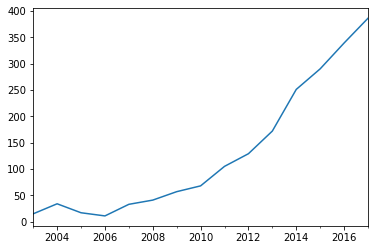

In [7]:
train.plot()

'\ncreate_data_diff2 = create_data_diff1.diff(1) # diff2\ncreate_data_diff2.dropna(inplace=True)\ncreate_data_diff2.plot()\n'

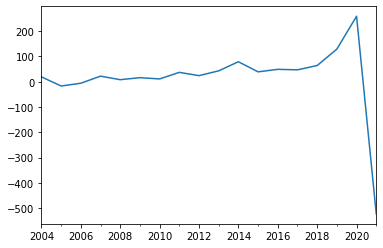

In [8]:
# Sequence instability
create_data_diff1 = create_data.diff(1)
create_data_diff1.dropna(inplace=True)
create_data_diff1.plot()
'''
create_data_diff2 = create_data_diff1.diff(1) # diff2
create_data_diff2.dropna(inplace=True)
create_data_diff2.plot()
'''

In [9]:
train_diff1,test_diff1 = create_data_diff1[0:14], create_data_diff1[14:-1]
# train_diff2,test_diff2 = create_data_diff2[0:13], create_data_diff2[13:-1] # diff2

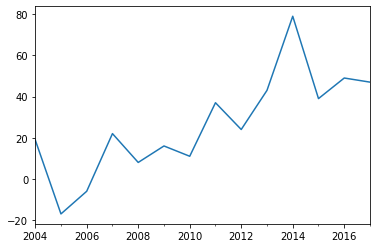

In [10]:
train_diff1.plot()

In [11]:
# fit model
model = ARIMA(train_diff1,order=(1,1,1))
model_result = model.fit()
print(model_result.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -54.958
Method:                       css-mle   S.D. of innovations             14.760
Date:                Fri, 21 May 2021   AIC                            117.915
Time:                        05:24:10   BIC                            120.175
Sample:                    12-31-2005   HQIC                           117.451
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8503      0.881      5.508      0.000       3.125       6.576
ar.L1.D.y     -0.2063      0.316     -0.653      0.528      -0.825       0.413
ma.L1.D.y     -1.0000      0.225     -4.441      0.0

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well

In [12]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
predictions =  model_result.forecast(steps = 3)
predictions

# Your code to show the performance RMSE 
print('RMSE为：',np.sqrt(mean_squared_error(test_diff1, predictions[0])))

RMSE为： 112.89465746121245


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

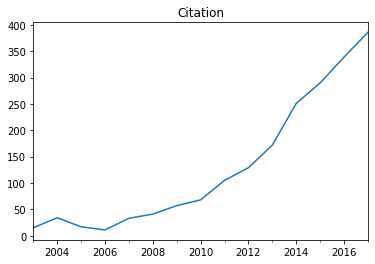

       ture  predictions
2018   64.0    65.879176
2019  129.0    67.835252
2020  259.0    73.282598


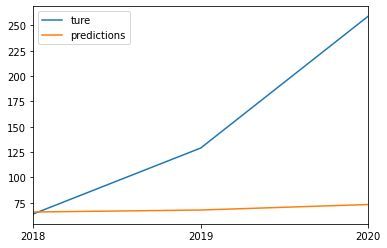

In [13]:
# You code: Visualize as required, the prediction with its confidence interval
import matplotlib.pylab as plt
train.plot()
#plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Citation")
plt.show()
test_df = pd.DataFrame(test_diff1,columns=['ture'])
test_df['predictions'] = predictions[0]
print(test_df)
test_df.plot()

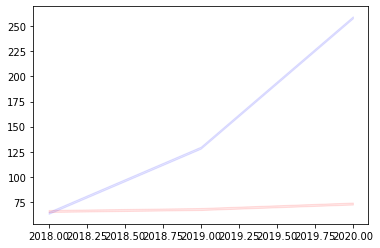

In [14]:
ci = 1.96 * np.std(test_df['ture'])/np.mean(test_df['ture'])
start = 2018 
end = start + len(test_df['ture'])
x = [int(i) for i in range(start,end)]
plt.fill_between(x,test_df['ture']+ci, test_df['ture']-ci, color='b', alpha=.1)
plt.fill_between(x,test_df['predictions']+ci, test_df['predictions']-ci, color='r', alpha=.1)

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [15]:
# your code to run grid search
import itertools
import warnings
warnings.filterwarnings('ignore')

p = d = q = range(1, 3)
pdq = list(itertools.product(p, d, q))
print('p,d,q',pdq,'\n')
RMSE = []
PARAMETER = []
for param in pdq:
  try:
    model = ARIMA(train,order=param)    
    model_fit = model.fit(disp=-1) #disp <0 no output
    predictions = model_fit.forecast(steps = 3)
    error = np.sqrt(mean_squared_error(test, predictions[0]))
    RMSE.append(error)
    PARAMETER.append(param)
  except:
    continue
df = pd.DataFrame(columns=['RMSE','PARAMETER'])
df['PARAMETER'] = PARAMETER
df['RMSE'] = RMSE
df.to_csv('/content/drive/MyDrive/2021SIT742Ass1/Search-results.csv',index=False)
df
# The remaining sets of models cannot be computed because they do not converge
# LinAlgError: SVD did not converge

p,d,q [(1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (2, 1, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2)] 



,RMSE,PARAMETER
0,145.538961,"(1, 2, 1)"
1,132.021928,"(1, 2, 2)"
2,139.093571,"(2, 2, 1)"
3,204.122712,"(2, 2, 2)"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

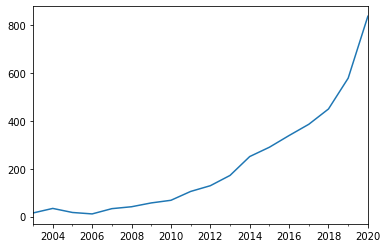

In [16]:
import itertools
import warnings
warnings.filterwarnings('ignore')

train_new = create_data[0:-1]
train_new.plot()

In [17]:
train_new_diff = create_data_diff1[:-1]
print(train_new_diff)

2004     19.0
2005    -17.0
2006     -6.0
2007     22.0
2008      8.0
2009     16.0
2010     11.0
2011     37.0
2012     24.0
2013     43.0
2014     79.0
2015     39.0
2016     49.0
2017     47.0
2018     64.0
2019    129.0
2020    259.0
Freq: A-DEC, dtype: float64


In [19]:
create_data_diff2 = create_data_diff1.diff(1) # diff2
create_data_diff2.dropna(inplace=True)
train_new_diff2 = create_data_diff2[:-1]
print(train_new_diff2)

2005    -36.0
2006     11.0
2007     28.0
2008    -14.0
2009      8.0
2010     -5.0
2011     26.0
2012    -13.0
2013     19.0
2014     36.0
2015    -40.0
2016     10.0
2017     -2.0
2018     17.0
2019     65.0
2020    130.0
Freq: A-DEC, dtype: float64


In [20]:
# your code to run grid search
import itertools
import warnings
warnings.filterwarnings('ignore')

p = d = q = range(1, 3)
pdq = list(itertools.product(p, d, q))
print('p,d,q',pdq,'\n')
RMSE = []
PARAMETER = []
for param in pdq:
  try:
    model = ARIMA(train_new_diff,order=param)    
    model_fit = model.fit(disp=-1) #disp <0 no output
    predictions = model_fit.forecast(steps = 3)
    error = np.sqrt(mean_squared_error(test, predictions[0]))
    RMSE.append(error)
    PARAMETER.append(param)
  except:
    continue
df = pd.DataFrame(columns=['RMSE','PARAMETER'])
df['PARAMETER'] = PARAMETER
df['RMSE'] = RMSE
df
# the data we use is processed by first-order difference

p,d,q [(1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (2, 1, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2)] 



,RMSE,PARAMETER
0,131.479997,"(1, 2, 1)"
1,105.639593,"(2, 2, 1)"


In [21]:
# your code to perform the Arima train on data 2003 to 2020
# train_new = create_data[0:-1]
model = ARIMA(train_new_diff2,order=(1,2,1))    
model_fit = model.fit() 

# Your code to predict for 2021 and 2022
predictions = model_fit.forecast(steps = 2)
output = pd.Series(predictions[0], index=pd.period_range('2021','2022',freq='Y'))
output

2021    136.888073
2022    165.460351
Freq: A-DEC, dtype: float64

<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

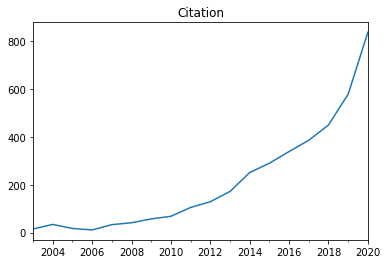

      predictions
2021   136.888073
2022   165.460351


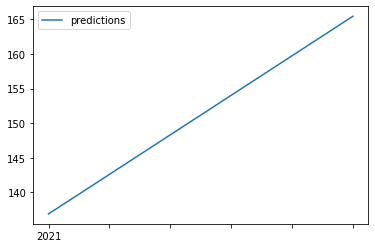

In [ ]:
# Plot the points and the prediction with its confidence interval
import matplotlib.pylab as plt
train_new.plot()
#plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Citation")
plt.show()
testnew_df = pd.DataFrame(columns=['predictions'],index = ['2021','2022'])
testnew_df['predictions'] = predictions[0]
print(testnew_df)
testnew_df.plot()

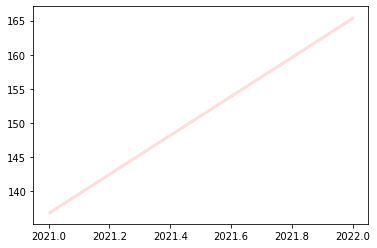

In [ ]:
ci = 1.96 * np.std(testnew_df['predictions'])/np.mean(testnew_df['predictions'])
start = 2021 
end = start + len(testnew_df['predictions'])
x = [int(i) for i in range(start,end)]
plt.fill_between(x,testnew_df['predictions']+ci, testnew_df['predictions']-ci, color='r', alpha=.1)

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
